In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [70]:
import warnings
warnings.filterwarnings('ignore')


In [14]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df



Definimos el data frame de los datos Wind Speed

In [15]:
dfspeep=pd.read_csv("C:\\Users\\Edward Morales\\Documents\\data_treino_dv_df_2000_2010.csv")


dfspeep.head(10)

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
5,17:00,0.034899,1.8,48.0,41.0,27.4,25.9,45.0,885.9,0.0,4.3,886.5,885.9
6,18:00,0.819152,1.8,46.0,36.0,28.3,26.8,38.0,885.5,0.0,6.3,885.9,885.5
7,19:00,0.798636,1.1,43.0,37.0,28.1,26.6,41.0,885.6,0.0,3.8,885.6,885.4
8,20:00,0.945519,1.5,45.0,38.0,27.4,25.8,44.0,885.9,0.0,3.0,885.9,885.5
9,21:00,-0.292372,1.3,59.0,45.0,25.8,23.6,51.0,886.2,0.0,3.2,886.2,885.8


In [16]:
column_names = dfspeep.columns.tolist()

column_names

['HORA (UTC)',
 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
 'VENTO, VELOCIDADE HORARIA (m/s)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
 'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)',
 'VENTO, RAJADA MAXIMA (m/s)',
 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)']

Miramos el nombre de todas las columnas

In [17]:
new_column_names = ['HORA',
 'DIRECION_HORARIA',
 'VELOCIDAD_HORARIA',
 'HUMEDAD_REL_MAX_HORA_ANT',
 'HUMIDADE_REL_MIN_HORA_ANT',
 'TEMPERATURA_MAX_HORA_ANT',
 'TEMPERATURA_MIN_HORA_ANT',
 'HUMIDADE_RELATIVA_HORARIA',
 'PRESION_ATMOSFERICA_NV_ESTACION',
 'PRECIPITAION_TOTAL_HORA',
 'RAFAGA_MAXIMA',
 'PRESION_ATMOSFERICA_MAX_HORA_ANT',
 'PRESION_ATMOSFERICA_MIN_HORA_ANT']
dfspeep.columns = new_column_names

dfspeep.head()

,HORA,DIRECION_HORARIA,VELOCIDAD_HORARIA,HUMEDAD_REL_MAX_HORA_ANT,HUMIDADE_REL_MIN_HORA_ANT,TEMPERATURA_MAX_HORA_ANT,TEMPERATURA_MIN_HORA_ANT,HUMIDADE_RELATIVA_HORARIA,PRESION_ATMOSFERICA_NV_ESTACION,PRECIPITAION_TOTAL_HORA,RAFAGA_MAXIMA,PRESION_ATMOSFERICA_MAX_HORA_ANT,PRESION_ATMOSFERICA_MIN_HORA_ANT
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Renombramos las columnas. 

Cambiamos la "Hora" a algo que pueda enteder el codigo

In [19]:
dfspeep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HORA                              87693 non-null  object 
 1   DIRECION_HORARIA                  87693 non-null  float64
 2   VELOCIDAD_HORARIA                 87693 non-null  float64
 3   HUMEDAD_REL_MAX_HORA_ANT          87693 non-null  float64
 4   HUMIDADE_REL_MIN_HORA_ANT         87693 non-null  float64
 5   TEMPERATURA_MAX_HORA_ANT          87693 non-null  float64
 6   TEMPERATURA_MIN_HORA_ANT          87693 non-null  float64
 7   HUMIDADE_RELATIVA_HORARIA         87693 non-null  float64
 8   PRESION_ATMOSFERICA_NV_ESTACION   87693 non-null  float64
 9   PRECIPITAION_TOTAL_HORA           87693 non-null  float64
 10  RAFAGA_MAXIMA                     87693 non-null  float64
 11  PRESION_ATMOSFERICA_MAX_HORA_ANT  87693 non-null  float64
 12  PRES

Vemos la infrmacion de cada variable y notamos que casi todas las variables son numericas, menos la "HORA"

In [20]:

dfspeep['HORA'] = dfspeep['HORA'].str.split(':').str[0].astype(int)

In [21]:
dfspeep['HORA_sin'] = np.sin(2 * np.pi * dfspeep['HORA'] / 24)
dfspeep['HORA_cos'] = np.cos(2 * np.pi * dfspeep['HORA'] / 24)

In [75]:

dfspeep

,HORA,DIRECION_HORARIA,VELOCIDAD_HORARIA,HUMEDAD_REL_MAX_HORA_ANT,HUMIDADE_REL_MIN_HORA_ANT,TEMPERATURA_MAX_HORA_ANT,TEMPERATURA_MIN_HORA_ANT,HUMIDADE_RELATIVA_HORARIA,PRESION_ATMOSFERICA_NV_ESTACION,PRECIPITAION_TOTAL_HORA,RAFAGA_MAXIMA,PRESION_ATMOSFERICA_MAX_HORA_ANT,PRESION_ATMOSFERICA_MIN_HORA_ANT,HORA_sin,HORA_cos
0,12,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7,1.224647e-16,-1.000000
1,13,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2,-2.588190e-01,-0.965926
2,14,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1,-5.000000e-01,-0.866025
3,15,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4,-7.071068e-01,-0.707107
4,16,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5,-8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1,-9.659258e-01,0.258819
87689,20,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9,-8.660254e-01,0.500000
87690,21,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2,-7.071068e-01,0.707107
87691,22,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6,-5.000000e-01,0.866025


Se convitio la Hora en un entero, pero para que los modelos puedan entenderla mejor, ya que la hora es algo ciclico y no algo lineal como los numeros que solo avanzan, utiice la funcion Seno y Coseno para volver los datos Hora un ciclo, esto con el fin de que el modelo lo pueda entender más facilemente.

In [104]:
dfspeep.describe()

,HORA,DIRECION_HORARIA,VELOCIDAD_HORARIA,HUMEDAD_REL_MAX_HORA_ANT,HUMIDADE_REL_MIN_HORA_ANT,TEMPERATURA_MAX_HORA_ANT,TEMPERATURA_MIN_HORA_ANT,HUMIDADE_RELATIVA_HORARIA,PRESION_ATMOSFERICA_NV_ESTACION,PRECIPITAION_TOTAL_HORA,RAFAGA_MAXIMA,PRESION_ATMOSFERICA_MAX_HORA_ANT,PRESION_ATMOSFERICA_MIN_HORA_ANT,HORA_sin,HORA_cos
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,8.769300e+04
mean,11.506437,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093,-0.001756,2.550317e-03
std,6.932300,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539,0.707336,7.068787e-01
min,0.000000,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000,-1.000000,-1.000000e+00
25%,5.000000,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000,-0.707107,-7.071068e-01
50%,12.000000,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000,0.000000,6.123234e-17
75%,18.000000,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000,0.707107,7.071068e-01
max,23.000000,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000,1.000000,1.000000e+00


Analizar las horas no tiene mucho sentido. Direccion hora, vemos un sesgo a la derecha lo que se vera mejor en los hsitogramas de cada variable, 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def graficar_histogramas(dataframe, columnas):
    # Número de columnas que se quieren graficar
    n = len(columnas)
    
    # Determinar el número de filas y columnas para los subplots
    filas = int(np.ceil(np.sqrt(n)))
    columnas_subplot = int(np.ceil(n / filas))
    
    # Crear una figura con subplots organizados en matriz
    fig, axs = plt.subplots(filas, columnas_subplot, figsize=(6*columnas_subplot, 6*filas))
    
    # Si hay solo una fila o una columna, axs no es una matriz 2D, así que lo convertimos para uniformidad
    if filas == 1 or columnas_subplot == 1:
        axs = np.array(axs).reshape(filas, columnas_subplot)
    
    # Graficar histograma para cada columna
    for i, columna in enumerate(columnas):
        ax = axs[i // columnas_subplot, i % columnas_subplot]
        dataframe[columna].hist(ax=ax)
        ax.set_title(f'Histograma de {columna}')
        ax.set_xlabel(columna)
        ax.set_ylabel('Frecuencia')
    
    # Si hay espacios vacíos en la matriz de subplots, los ocultamos
    for i in range(n, filas * columnas_subplot):
        axs[i // columnas_subplot, i % columnas_subplot].axis('off')
    
    # Ajustar el layout
    plt.tight_layout()
    plt.show()


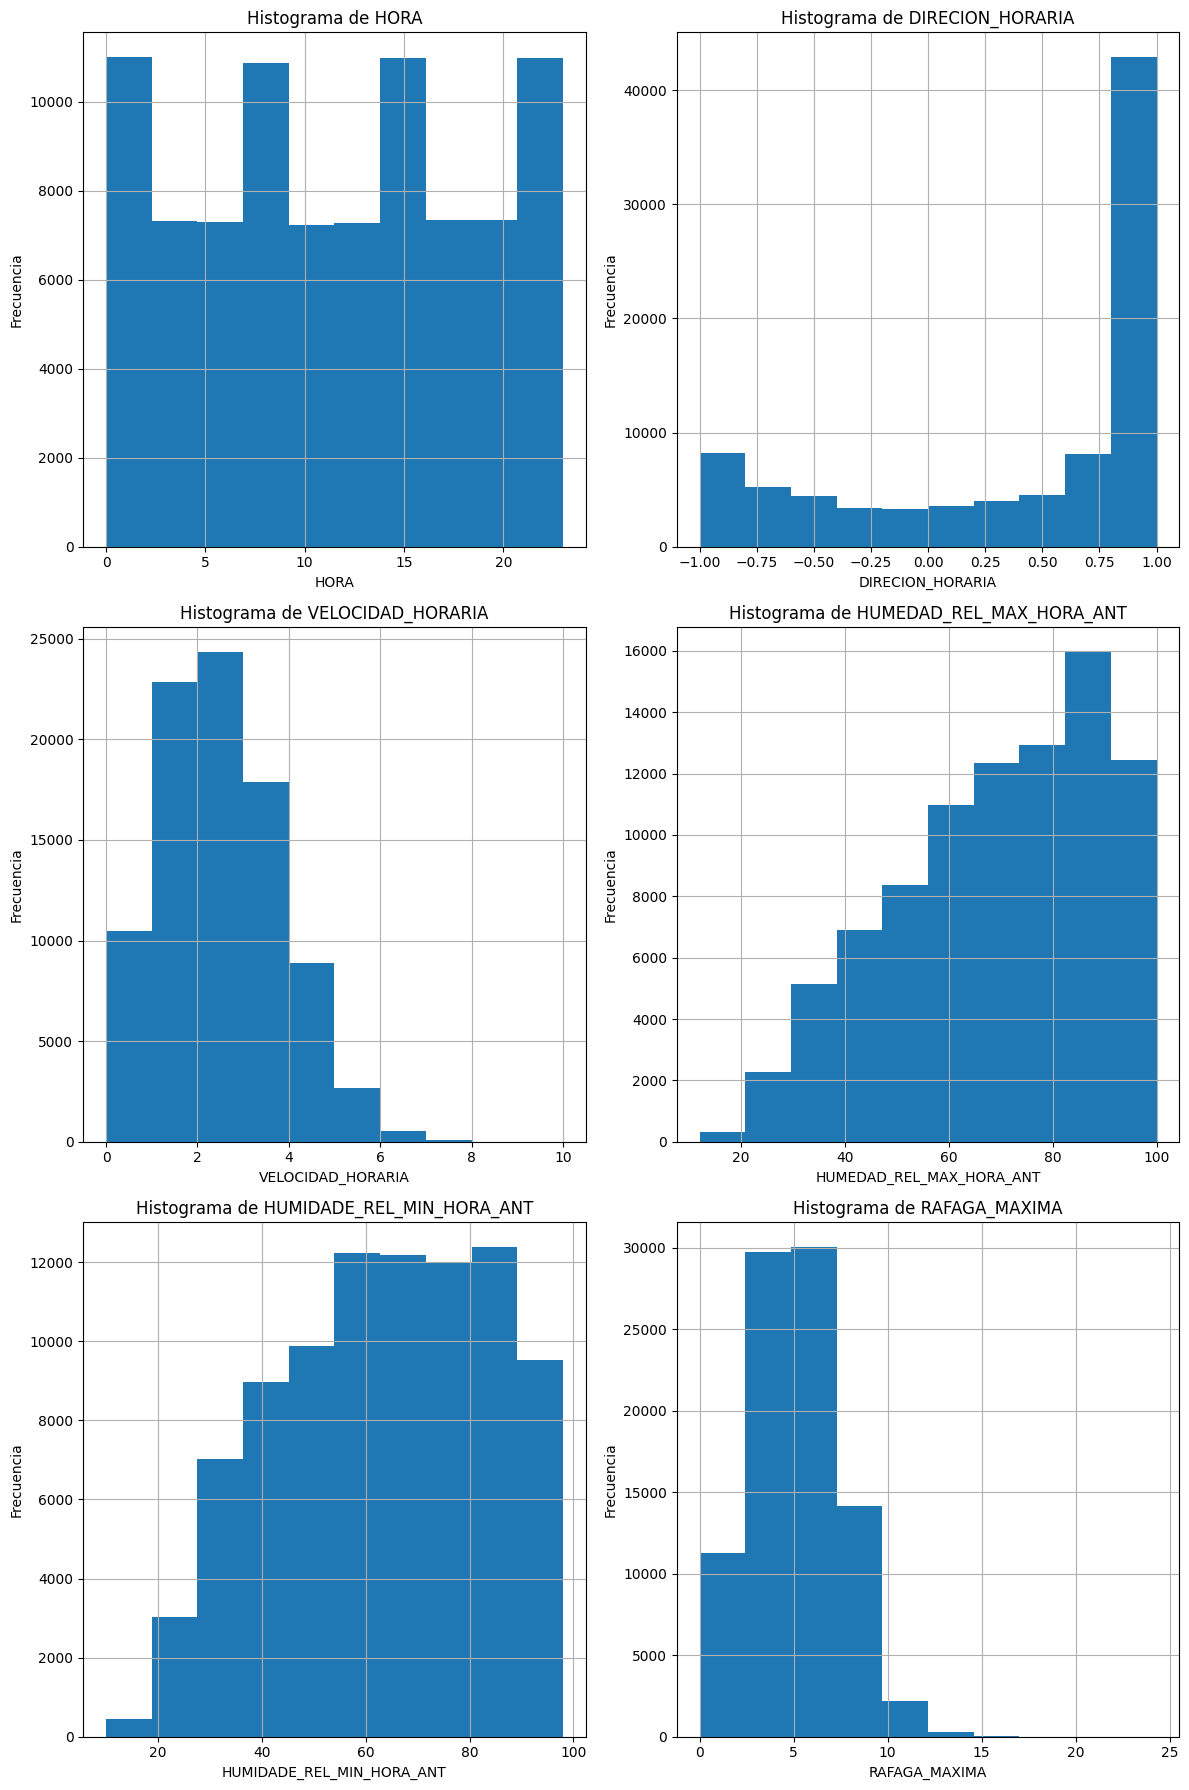

In [38]:
columnas_a_graficar = ['DIRECION_HORARIA',
 'VELOCIDAD_HORARIA',
 'HUMEDAD_REL_MAX_HORA_ANT',
 'HUMIDADE_REL_MIN_HORA_ANT',
 'TEMPERATURA_MAX_HORA_ANT',
 'TEMPERATURA_MIN_HORA_ANT',
 'HUMIDADE_RELATIVA_HORARIA',
 'PRESION_ATMOSFERICA_NV_ESTACION',
 'PRECIPITAION_TOTAL_HORA',
 'RAFAGA_MAXIMA',
 'PRESION_ATMOSFERICA_MAX_HORA_ANT',
 'PRESION_ATMOSFERICA_MIN_HORA_ANT']  

all = [ 'HORA','DIRECION_HORARIA',
 'VELOCIDAD_HORARIA',
 'HUMEDAD_REL_MAX_HORA_ANT',
 'HUMIDADE_REL_MIN_HORA_ANT',
 'TEMPERATURA_MAX_HORA_ANT',
 'TEMPERATURA_MIN_HORA_ANT',
 'HUMIDADE_RELATIVA_HORARIA',
 'PRESION_ATMOSFERICA_NV_ESTACION',
 'PRECIPITAION_TOTAL_HORA',
 'RAFAGA_MAXIMA',
 'PRESION_ATMOSFERICA_MAX_HORA_ANT',
 'PRESION_ATMOSFERICA_MIN_HORA_ANT','HORA_sin','HORA_cos']
graficar_histogramas(dfspeep, columnas_a_graficar)

Aqui tenemos los Histogramas de los datos, sus valores contra la frecuencia, Para el **Hora** no hay mucho que decir, ya que en este caso no es dato que se pueda interprear con este grafico, En cambio la **dirrecion hoarria** siendo el lugar a donde apunta el viento, este puede verse como que durante ma mayor parte del tiempo este apunta a dirreciones cercanas a 1. Para **Velocidad Horaria** podemos notar como la gran catidad de registros estan entre velocidad 1 y 3 por lo que esa es la velocidad más comun del viento, y tiene muy pocos registros mayores a 6 de velocidad. **Humedad Relativa maxima Hora aterior**: muestra muchisimos registros entre 60 y 90, notandoce un cesgo hacia la izquierda, siendo muy parecido al grafico de **Humedad relariva minima hora anterior**, pero sin el pico entre los 80 y 100, y finalmente para **rafaga maxima** se nota un sesgo hacia la derecha viendo que la inmesa mayoria de datos estan entre 3 y 6

### Datos falrantes

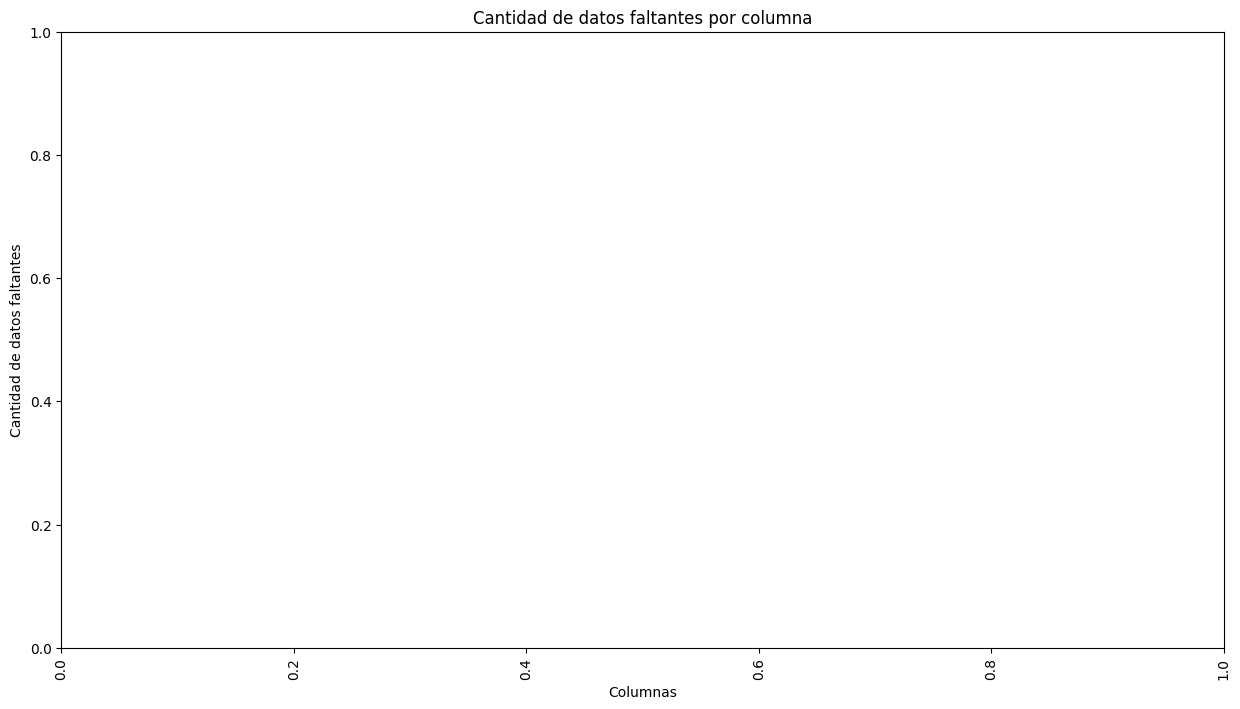

In [14]:
import seaborn as sns
# Calcular la cantidad de datos NA por columna
all_data_NA = dfspeep.isna().sum()

# Filtrar solo las columnas que tienen datos NA
all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
sns.barplot(x=all_data_NA.index, y=all_data_NA.values)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.ylabel('Cantidad de datos faltantes')
plt.xlabel('Columnas')
plt.title('Cantidad de datos faltantes por columna')
plt.show()

Como se puede ver no hay ninguna columna que tenga datos faltantes por lo que el porcentaje seria del 0%

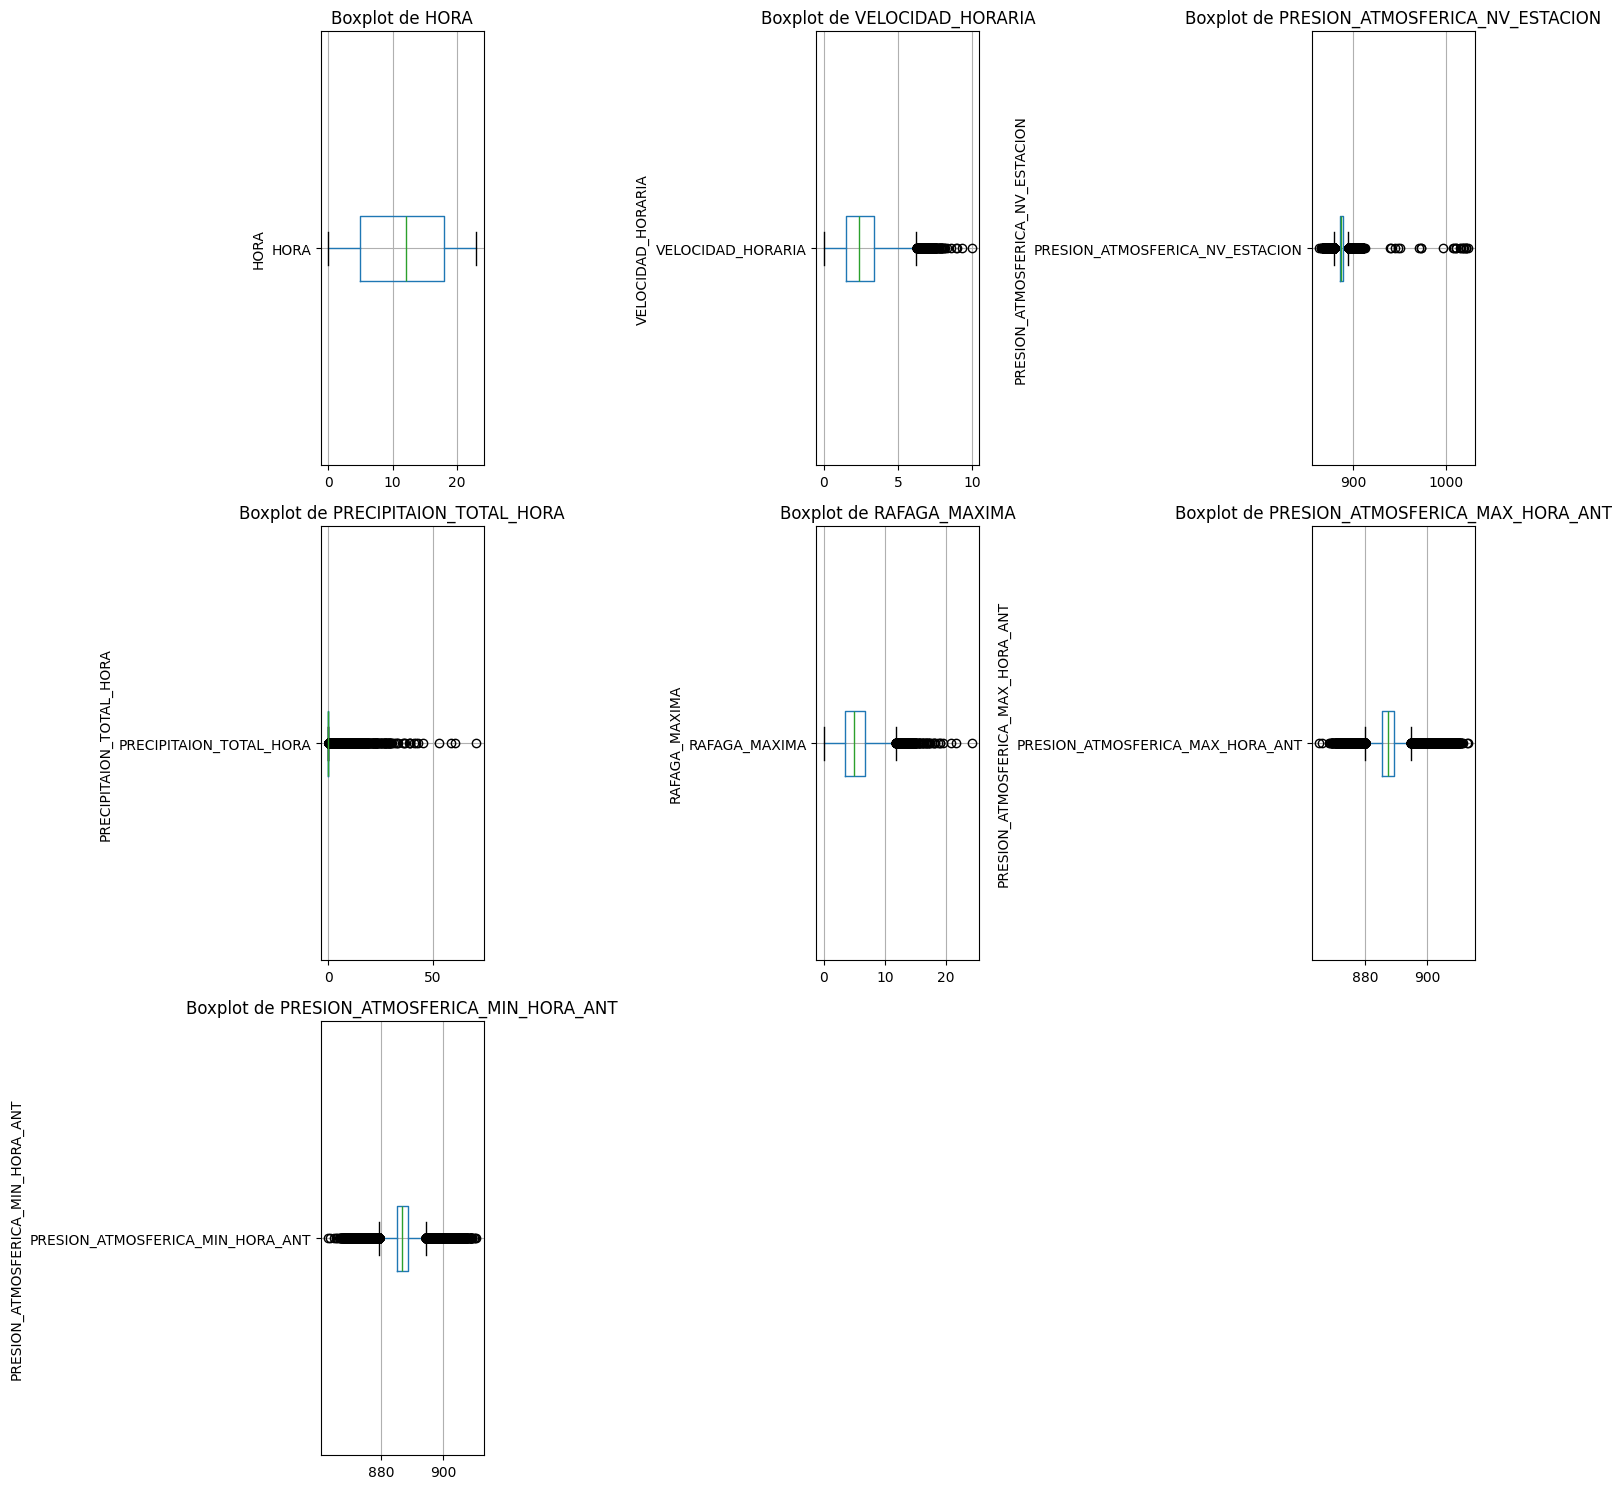

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def graficar_boxplots(dataframe, columnas):
    # Número de columnas que se quieren graficar
    n = len(columnas)
    
    # Determinar el número de filas y columnas para los subplots
    filas = int(np.ceil(np.sqrt(n)))
    columnas_subplot = int(np.ceil(n / filas))
    
    # Crear una figura con subplots organizados en matriz
    fig, axs = plt.subplots(filas, columnas_subplot, figsize=(5*columnas_subplot, 5*filas))
    
    # Si hay solo una fila o una columna, axs no es una matriz 2D, así que lo convertimos para uniformidad
    if filas == 1 or columnas_subplot == 1:
        axs = np.array(axs).reshape(filas, columnas_subplot)
    
    # Graficar boxplot para cada columna
    for i, columna in enumerate(columnas):
        ax = axs[i // columnas_subplot, i % columnas_subplot]
        dataframe.boxplot(column=columna, ax=ax,vert=False)
        ax.set_title(f'Boxplot de {columna}')
        ax.set_ylabel(columna)
    
    # Si hay espacios vacíos en la matriz de subplots, los ocultamos
    for i in range(n, filas * columnas_subplot):
        axs[i // columnas_subplot, i % columnas_subplot].axis('off')
    
    # Ajustar el layout
    plt.tight_layout()
    plt.show()

graficar_boxplots(dfspeep, columnas_a_graficar)


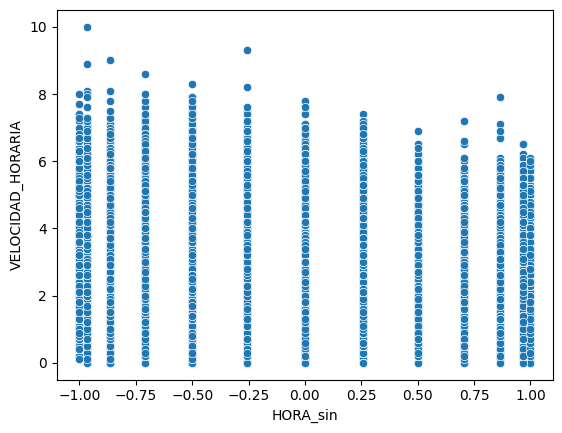

In [28]:
sns.scatterplot(data= dfspeep , x="HORA_sin", y="VELOCIDAD_HORARIA")
indep = [ 'HORA','VELOCIDAD_HORARIA','PRESION_ATMOSFERICA_NV_ESTACION',
 'PRECIPITAION_TOTAL_HORA',
 'RAFAGA_MAXIMA',
 'PRESION_ATMOSFERICA_MAX_HORA_ANT',
 'PRESION_ATMOSFERICA_MIN_HORA_ANT']


Vemos la relacion entre Hora_sin (La hora transformada en la funcion seno, pero funciona de la misma froma) y Velocidad_Horarua, siendo cada punto un registro guadrdado en esa hora en especifico

<Axes: xlabel='HORA_cos', ylabel='VELOCIDAD_HORARIA'>

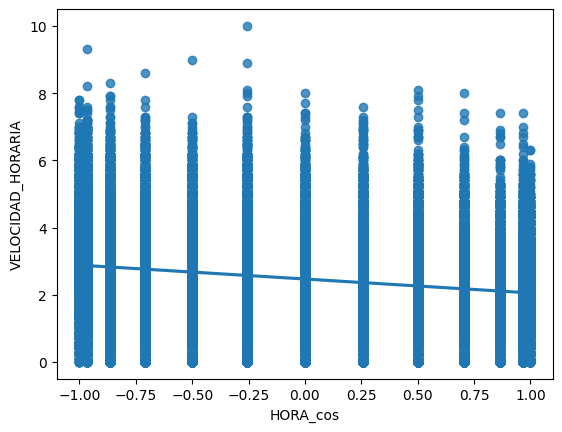

In [16]:
sns.regplot(data=dfspeep, x="HORA_cos", y="VELOCIDAD_HORARIA")

Aqui vemos los mismo pero con una linea que muestra la tendencia de los dartos a lo largo de las horas

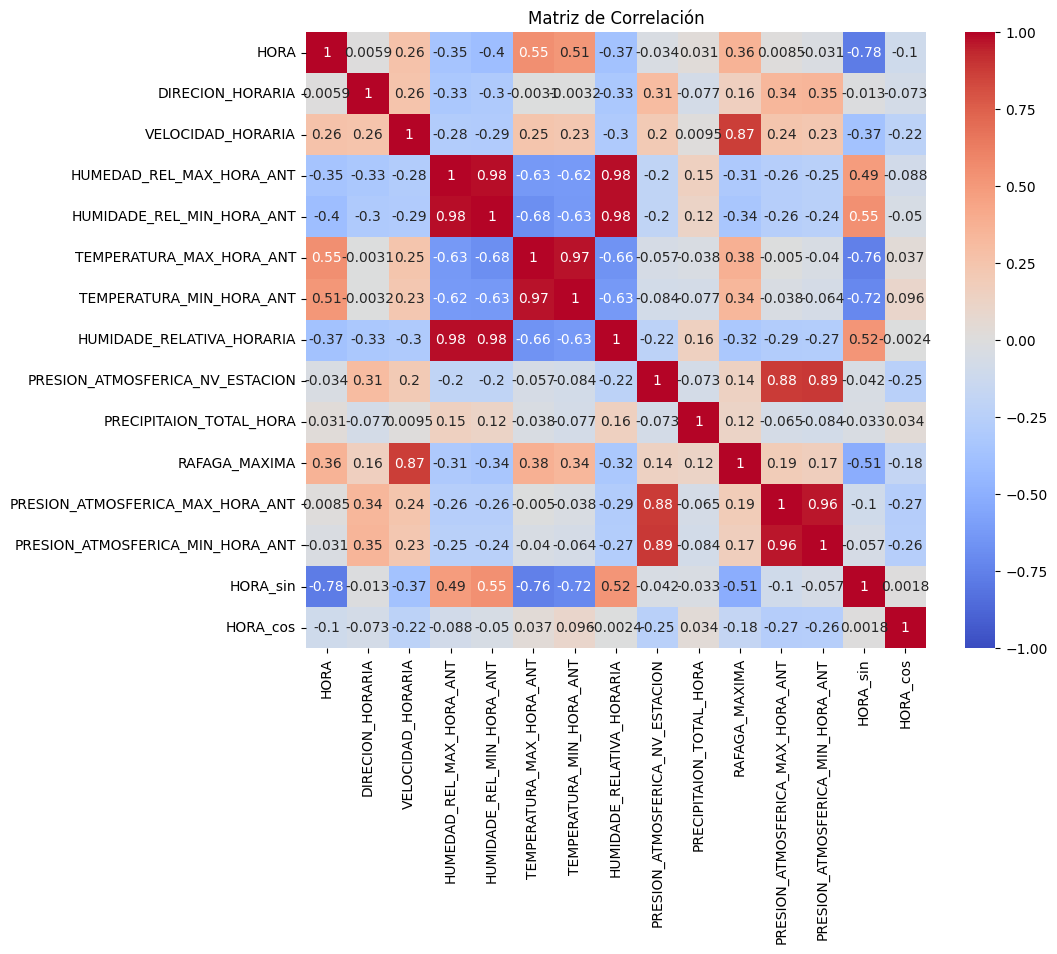

In [39]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columnas_a_incluir = [col for col in dfspeep.columns if col in all]
df_seleccionado = dfspeep[columnas_a_incluir]

# Calcula la matriz de correlación
correlation_matrix = df_seleccionado.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


Esta es una matriz de correlacion, que muestra cuando describe una variable a hora, lo que se espera es que las variables descriptivas no esten muy correcacionadas entre ellas, es decir sean independientes, y que asu vez describan mucho a la variable a predecir, ya que es dificil ver esto a simple viste usamos el VIF para que nos indique la correlacion que existe entre las variables y asi eliminarlas para evitar la multicolinialidad.

In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# HUMIDADE_REL_MIN_HORA_ANT, 'HUMIDADE_RELATIVA_HORARIA',  'TEMPERATURA_MAX_HORA_ANT','PRESION_ATMOSFERICA_MIN_HORA_ANT' ,'RAFAGA_MAXIMA'
vife =[ 'DIRECION_HORARIA',
 'VELOCIDAD_HORARIA',
 'HUMEDAD_REL_MAX_HORA_ANT',
 'TEMPERATURA_MIN_HORA_ANT',
 'PRESION_ATMOSFERICA_NV_ESTACION',
 'PRECIPITAION_TOTAL_HORA',
 'PRESION_ATMOSFERICA_MAX_HORA_ANT','HORA_cos', 'HORA_sin']
columnas_a_incluir = [col for col in dfspeep.columns if col in vife]
df_seleccionado = dfspeep[columnas_a_incluir]
df_with_const = add_constant(df_seleccionado)


# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)


                           Variable           VIF
0                             const  82955.463490
1                  DIRECION_HORARIA      1.326674
2                 VELOCIDAD_HORARIA      1.342965
3          HUMEDAD_REL_MAX_HORA_ANT      2.192850
4          TEMPERATURA_MIN_HORA_ANT      2.931188
5   PRESION_ATMOSFERICA_NV_ESTACION      4.549918
6           PRECIPITAION_TOTAL_HORA      1.051695
7  PRESION_ATMOSFERICA_MAX_HORA_ANT      4.826395
8                          HORA_sin      2.373365
9                          HORA_cos      1.169343


Elimine variables de una en una y finalemte estas fueron las vaiables que quedaron, aquellas con un VIF menor a 5

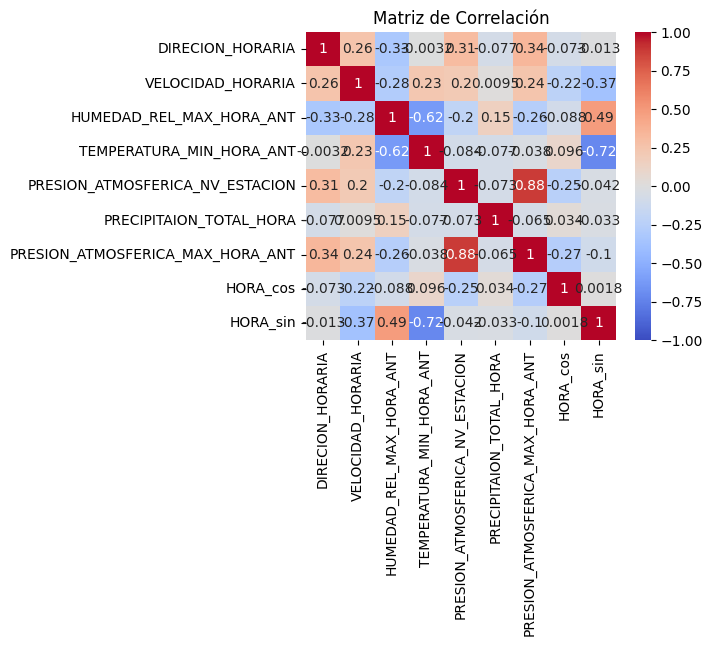

In [50]:

df_seleccionado = dfspeep[vife]

# Calcula la matriz de correlación
correlation_matrix = df_seleccionado.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Volvemos a graficar la matriz de correlacion y notamos que cada variable no se encuentra definida por otra (que no sea la predictoria con la a predecir), el cual es el concepto de multicolinialidad

In [44]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

#### Implementacion de los Modelos

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [63]:
dfx = df_seleccionado.drop(columns = ["VELOCIDAD_HORARIA"])
dfy = df_seleccionado["VELOCIDAD_HORARIA"]
test = df_seleccionado.iloc[:, -24:]

Definimos dfx como todas las variables menos "VELOCIDAD_HOARIA" las cuales se utulizaran para tratar de describir esta misma, la cual se guarda en dfy, asi mismo se define "test", que tendra los ultimas 24 registros del data frame y estos datos no se tocaran hasta el final.

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score, mean_squared_error
from math import sqrt
import joblib



# Definir modelos y hiperparámetros
models = {
    'K-NN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'XGBoost': (XGBRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1]}),
    'SVM': (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'MLP': (MLPRegressor(), {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh']})
}

# Listas para almacenar métricas
r2_scores = []
mae_scores = []
evs_scores = []
rmse_scores = []
rmsle_scores = []
best_models = {}

for model_name, (model, params) in models.items():
    print(f"Entrenando {model_name}...")
    
    for i in range(10):
        # Seleccionar datos de entrenamiento
        X_train = dfx.iloc[:24*(i+1)]
        y_train = dfy.iloc[:24*(i+1)]
        
        # Seleccionar datos de validación
        X_valid = dfx.iloc[24*(i+1):24*(i+2)]
        y_valid = dfy.iloc[24*(i+1):24*(i+2)]
        
        # Uso de GridSearchCV para encontrar los mejores hiperparámetros
        grid = GridSearchCV(model, params, cv=3)
        grid.fit(X_train, y_train)
        
        # Predecir en el conjunto de validación con el mejor modelo
        y_pred = grid.best_estimator_.predict(X_valid)
        best_models[model_name] = grid.best_estimator_
        joblib.dump(grid.best_estimator_, f"{model_name}_best_model.pkl")
        
        
        # Calcular métricas y agregarlas a las listas
        r2_scores.append(r2_score(y_valid, y_pred))
        mae_scores.append(mean_absolute_error(y_valid, y_pred))
        rmse_scores.append(sqrt(mean_squared_error(y_valid, y_pred)))

    
    print(f"Promedio R2 para {model_name}: {np.mean(r2_scores)}")
    print(f"Promedio MAE para {model_name}: {np.mean(mae_scores)}")
    print(f"Promedio RMSE para {model_name}: {np.mean(rmse_scores)}")



Entrenando K-NN...
Promedio R2 para K-NN: -0.8990784571368401
Promedio MAE para K-NN: 0.8332145454750153
Promedio RMSE para K-NN: 1.013794470906353
Entrenando Ridge...
Promedio R2 para Ridge: -0.8365928167237706
Promedio MAE para Ridge: 0.8210276664741846
Promedio RMSE para Ridge: 0.9803556802698914
Entrenando Lasso...
Promedio R2 para Lasso: -0.8343351958074223
Promedio MAE para Lasso: 0.8195216330197491
Promedio RMSE para Lasso: 0.9727098371314075
Entrenando XGBoost...
Promedio R2 para XGBoost: -0.9111897835701372
Promedio MAE para XGBoost: 0.8309040780516618
Promedio RMSE para XGBoost: 0.9918253124601055
Entrenando SVM...
Promedio R2 para SVM: -0.9191299775877546
Promedio MAE para SVM: 0.8343128652674452
Promedio RMSE para SVM: 0.9920205260704565
Entrenando MLP...
Promedio R2 para MLP: -0.9248950429201658
Promedio MAE para MLP: 0.8478051256704623
Promedio RMSE para MLP: 1.0072120619251341


Modelo entrenado con las primeras 264 Horas y podemos ver que sus resultados son pesimos, R2 va desde menos infinito hasta 1, siendo uno un modelo perfecto, porlo menos un R2 de 0.5 dice que escribe la mitad e los resultados bien, pero este modelo esta lejos de estos resultados, por lo que decido aumentra el nuemro de datos utilizados para volver a entrenar los modelos.

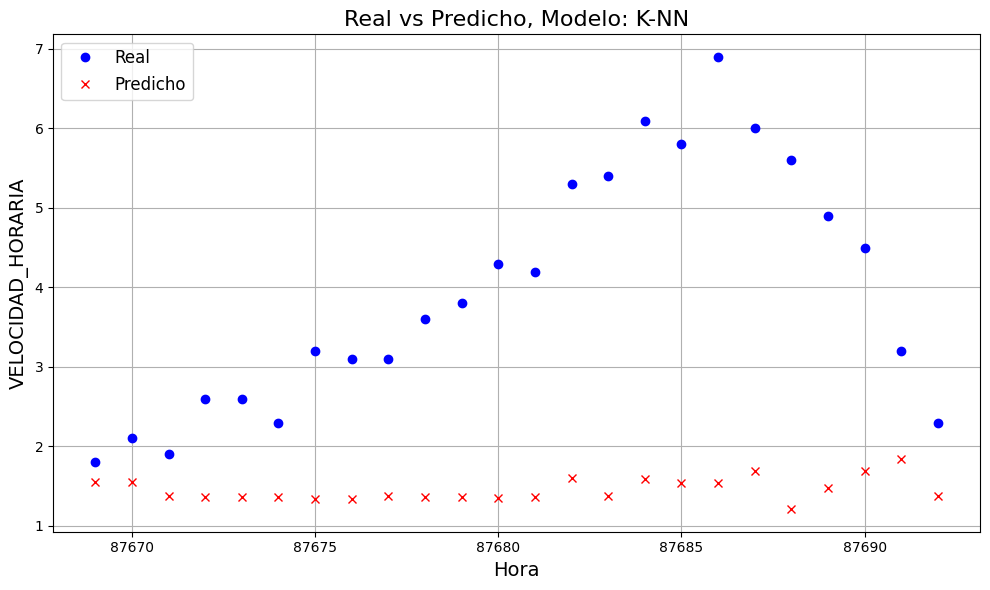

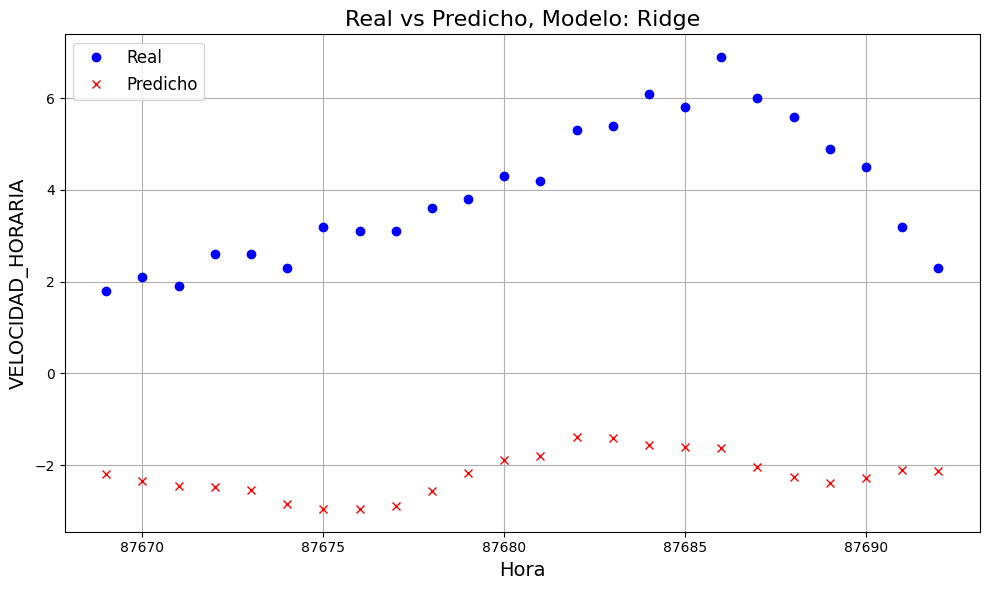

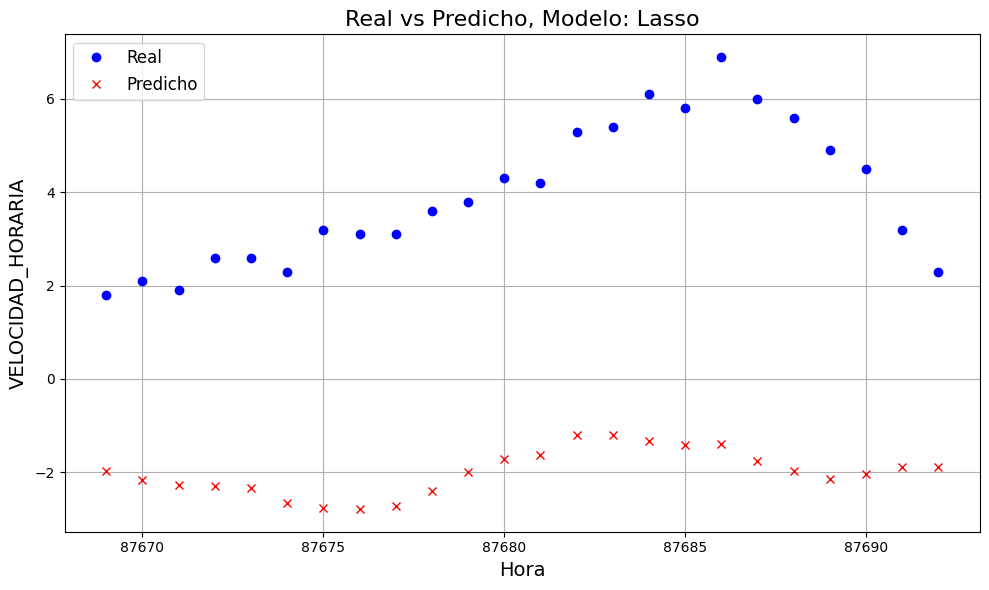

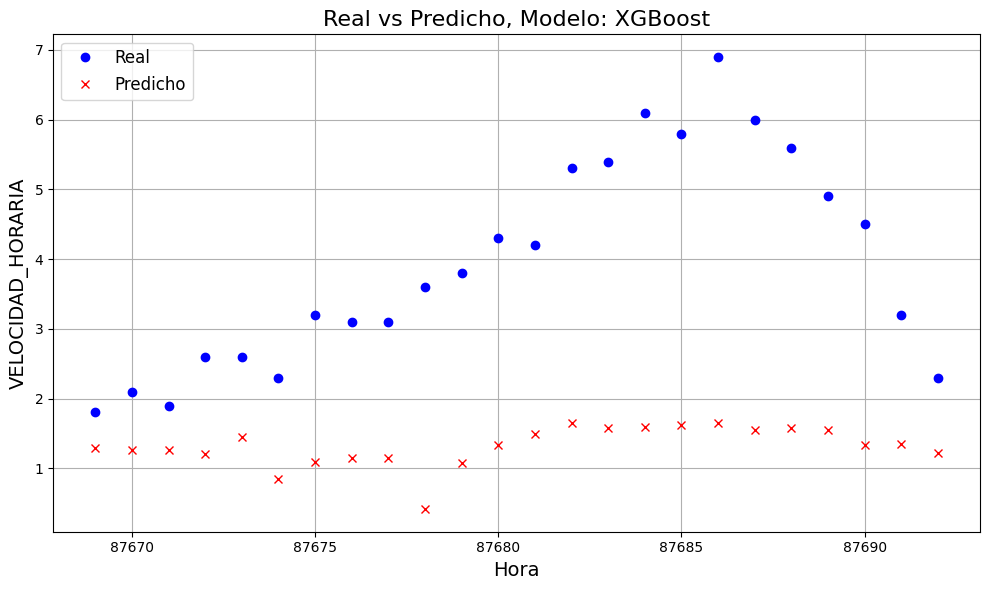

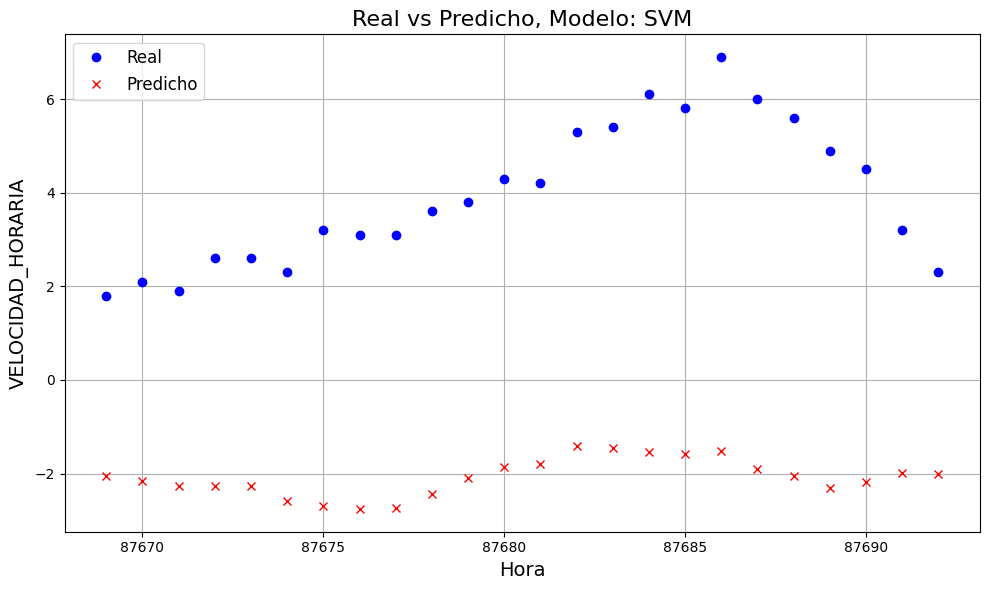

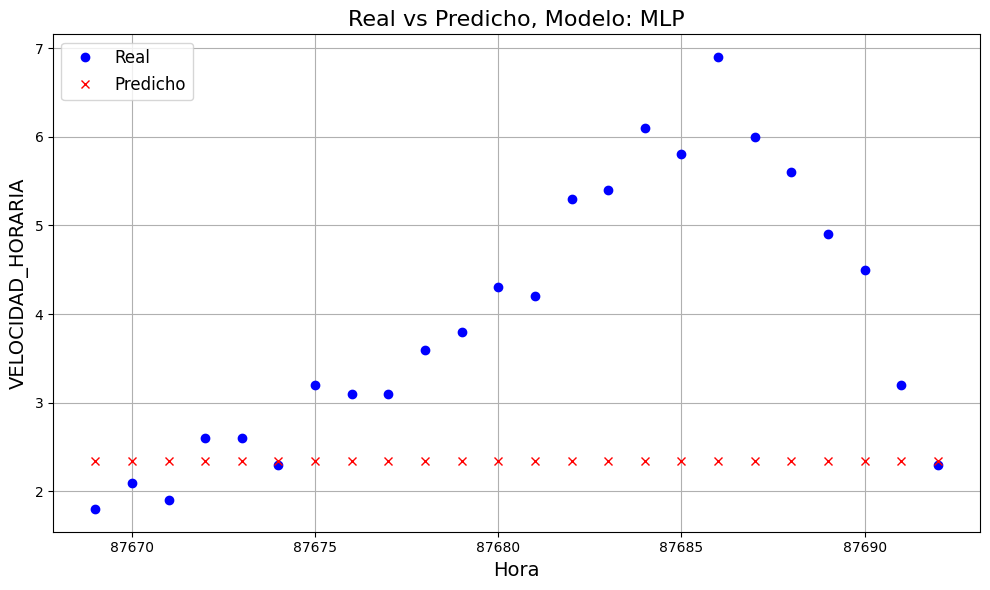

In [107]:
import matplotlib.pyplot as plt
import joblib

datos_nuevos = dfx.tail(24)
y_real = dfy.tail(24)
horas = y_real.index

model_names = ['K-NN', 'Ridge', 'Lasso', 'XGBoost', 'SVM', 'MLP']

for model_name in model_names:
    # Cargar el modelo
    model_filename = f"{model_name}_best_model.pkl"
    model = joblib.load(model_filename)
    
    # Hacer predicciones
    y_pred = model.predict(datos_nuevos)
    
    # Graficar los valores reales vs. predicciones
    plt.figure(figsize=(10, 6))
    plt.plot(horas, y_real.values, 'o', label='Real', color='blue')
    plt.plot(horas, y_pred, 'x', label='Predicho', color='red')
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('VELOCIDAD_HORARIA', fontsize=14)
    plt.title(f'Real vs Predicho, Modelo: {model_name}', fontsize=16)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()




Podemos ver los resultados de este modelo entrenado con las 264 primeras horas e intentando estimar las ultimas 24 horas, vemos que tiene un desempeño pesimo, en todos los modelos se presenta subajuste, la diferencia entre los valores predichos y los reales es muy grande como para considerar utilizar estos modelos para predecir a si que se debe aumentar la cantidad de datos para ver si se logra un mejor rendimiento, tomo las 12525 primerras horas (si mi computador lo permite) y vuelvo a entrenar el modelo.

In [108]:
# Definir modelos y hiperparámetros
models = {
    'K-NN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'XGBoost': (XGBRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1]}),
    'SVM': (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'MLP': (MLPRegressor(), {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh']})
}

# Listas para almacenar métricas
r2_scores = []
mae_scores = []
evs_scores = []
rmse_scores = []
rmsle_scores = []
best_models = {}

for model_name, (model, params) in models.items():
    print(f"Entrenando {model_name}...")
    
    for i in range(500):
        # Seleccionar datos de entrenamiento
        X_train = dfx.iloc[:24*(i+1)]
        y_train = dfy.iloc[:24*(i+1)]
        
        # Seleccionar datos de validación
        X_valid = dfx.iloc[24*(i+1):24*(i+2)]
        y_valid = dfy.iloc[24*(i+1):24*(i+2)]
        
        # Uso de GridSearchCV para encontrar los mejores hiperparámetros
        grid = GridSearchCV(model, params, cv=3)
        grid.fit(X_train, y_train)
        
        # Predecir en el conjunto de validación con el mejor modelo
        y_pred = grid.best_estimator_.predict(X_valid)
        best_models[model_name] = grid.best_estimator_
        joblib.dump(grid.best_estimator_, f"{model_name}_best_model.pkl")
        
        
        # Calcular métricas y agregarlas a las listas
        r2_scores.append(r2_score(y_valid, y_pred))
        mae_scores.append(mean_absolute_error(y_valid, y_pred))
        rmse_scores.append(sqrt(mean_squared_error(y_valid, y_pred)))

    
    print(f"Promedio R2 para {model_name}: {np.mean(r2_scores)}")
    print(f"Promedio MAE para {model_name}: {np.mean(mae_scores)}")
    print(f"Promedio RMSE para {model_name}: {np.mean(rmse_scores)}")

Entrenando K-NN...
Promedio R2 para K-NN: -0.3285220790656897
Promedio MAE para K-NN: 0.9358611374573381
Promedio RMSE para K-NN: 1.1423767785331924
Entrenando Ridge...
Promedio R2 para Ridge: -0.28729419608532236
Promedio MAE para Ridge: 0.9254016124014445
Promedio RMSE para Ridge: 1.124907444855048
Entrenando Lasso...
Promedio R2 para Lasso: -0.27397224570160883
Promedio MAE para Lasso: 0.9224131465740065
Promedio RMSE para Lasso: 1.1192425585555177
Entrenando XGBoost...
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_14872\599879684.py", line 33, in <module>
    grid.fit(X_train, y_train)
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\sklearn\model_selection\_search.py", line 936, in fit
    refit_end_time = time.time()
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\xgboost\core.py",

In [ ]:
datos_nuevos = dfx.tail(24)
y_real = dfy.tail(24)
horas = y_real.index

model_names = ['K-NN', 'Ridge', 'Lasso']

for model_name in model_names:
    # Cargar el modelo
    model_filename = f"{model_name}_best_model.pkl"
    model = joblib.load(model_filename)
    
    # Hacer predicciones
    y_pred = model.predict(datos_nuevos)
    
    # Graficar los valores reales vs. predicciones
    plt.figure(figsize=(10, 6))
    plt.plot(horas, y_real.values, 'o', label='Real', color='blue')
    plt.plot(horas, y_pred, 'x', label='Predicho', color='red')
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('VELOCIDAD_HORARIA', fontsize=14)
    plt.title(f'Real vs Predicho, Modelo: {model_name}', fontsize=16)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()